In [1]:
import os.path
from os import path
import pandas as pd

# 캐글 ↓제출경로
data_path = '/kaggle/input/kdt-ai-1/'
if not path.exists(data_path):
    data_path = './input/COVID_19_XRAY/'

train_path = data_path + 'train/'
test_path = data_path + 'test/'

from glob import glob

print(f'훈련 데이터 경로 : {train_path}')
print(f'테스트 데이터 경로 : {test_path}')
print(f'훈련 데이터 개수 : {len(glob(train_path + "*.png"))}')
print(f'테스트 데이터 개수 : {len(glob(test_path + "*.png"))}')

훈련 데이터 경로 : ./input/COVID_19_XRAY/train/
테스트 데이터 경로 : ./input/COVID_19_XRAY/test/
훈련 데이터 개수 : 2000
테스트 데이터 개수 : 400


In [2]:
# 데이터 프레임 요약해서 보기
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [3]:
# label_df 확인하기
label_path = train_path + 'labels.csv'
label_df = pd.read_csv(label_path)

resumetable(label_df)

데이터셋 형상 : (2000, 2)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,filename,object,0,2000,image_001.png,image_002.png,image_003.png
1,label,object,0,2,covid,covid,normal


In [4]:
print(label_df.head())

        filename   label
0  image_001.png   covid
1  image_002.png   covid
2  image_003.png  normal
3  image_004.png  normal
4  image_005.png  normal


In [17]:
# 정상 흉부 및 폐렴 흉부 이미지 갯수 확인하기 

print(f"정상 흉부 이미지 개수 : {label_df['label'].value_counts()['normal']}")
print(f"코로나 흉부 이미지 개수 : {label_df['label'].value_counts()['covid']}")

정상 흉부 이미지 개수 : 1000
코로나 흉부 이미지 개수 : 1000


In [5]:
# 이미지 출력
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3):
    assert len(img_paths) <= rows*cols # 이미지가 행/열 갯수보다 많으면 오류 발생
    
    mpl.rc('font', size=5)
    plt.figure(figsize=(10,7))
    grid = gridspec.GridSpec(rows, cols) # 서브플롯 배치
    
    # 이미지 출력
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path) # 이미지 파일읽기
        ax = plt.subplot(grid[idx])
        ax.imshow(image) # 이미지 출력


image_2000.png


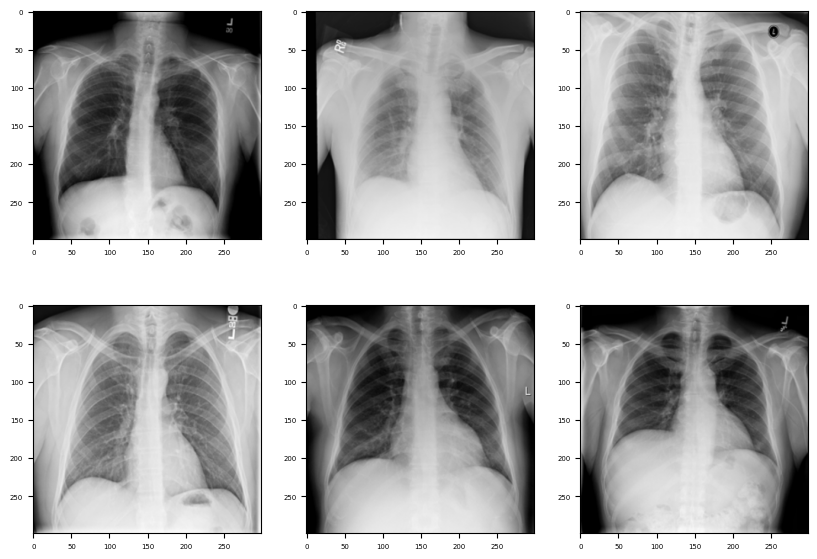

In [11]:
# 정상 엑스선 이미지 경로  
# 코로나 엑스선 이미지 경로
# 모아서 저장 
num_of_imgs = 6
all_normal_imgs = label_df[label_df['label'] == 'normal']['filename'].tolist()
all_normal_imgs = [train_path + filename for filename in all_normal_imgs]
normal_img_paths = all_normal_imgs[-num_of_imgs:]
# 이미지 출력 (정상 엑스선 이미지 출력 )
show_image(normal_img_paths)


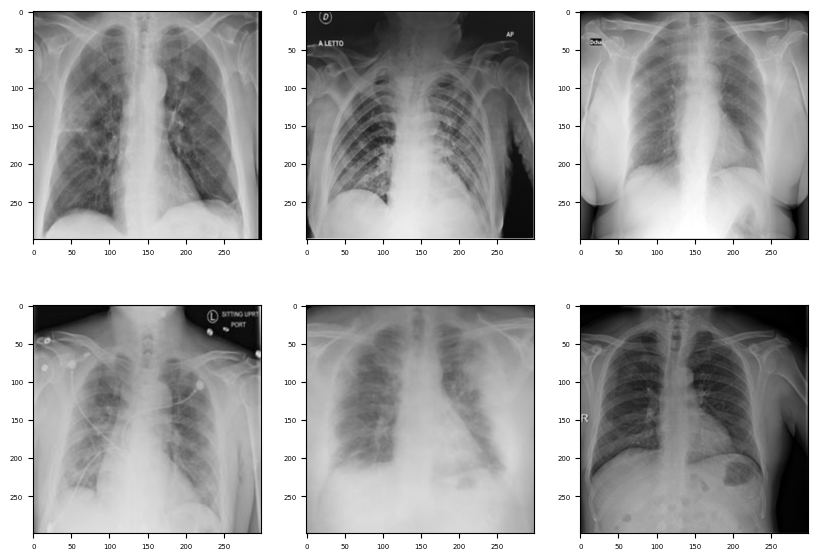

In [6]:
# 코로나 엑스선 이미지 경로
# 모아서 저장 
num_of_imgs = 6
all_covid_imgs = label_df[label_df['label'] == 'covid']['filename'].tolist()
all_covid_imgs = [train_path + filename for filename in all_covid_imgs]
covid_img_paths = all_covid_imgs[-num_of_imgs:]

# 이미지 출력 (정상 엑스선 이미지 출력 )
show_image(covid_img_paths)

In [14]:
# 폴더 구조 일부 선처리
import os
import shutil

# 폴더 생성 (기존재시 pass)
os.makedirs(f'{train_path}normal',  exist_ok=True)
os.makedirs(f'{train_path}covid', exist_ok=True)

for covid_img in all_covid_imgs:
    if path.exists(covid_img):
        shutil.move(covid_img, train_path+"covid/"+covid_img.split("/")[-1])

for normal_img in all_normal_imgs:
    if path.exists(normal_img):
        shutil.move(normal_img, train_path+"normal/"+normal_img.split("/")[-1])


In [ ]:

# 검증 데이터가 없으므로 훈련데이터에서 따로 추출하는게 좋을듯
# csv 가 아니기에 다루는 방식이 달라야함
# 훈련데이터가 적으니 , 성능점수 지나치게 신뢰 x 

# 베이스라인 모델 
    # 데이터 증강
    # 신경망 모델
    # 옵티마이저
    # 훈련 및 예측
# 성능 개성
    # 데이터 증강
    # 신경망 구조
    # 옵티마이저
    # 훈련 및 예측